ПОСТРОЕНИЕ СЛУЧАЙНОГО ЛЕСА (400 ДЕРЕВЬЕВ)

Целевая переменная: RESULT

РЕЗУЛЬТАТЫ RANDOM FOREST (400 деревьев):
Train Accuracy: 0.7015 (70.15%)
Test Accuracy:  0.6657 (66.57%)
ROC-AUC Score:  0.7319


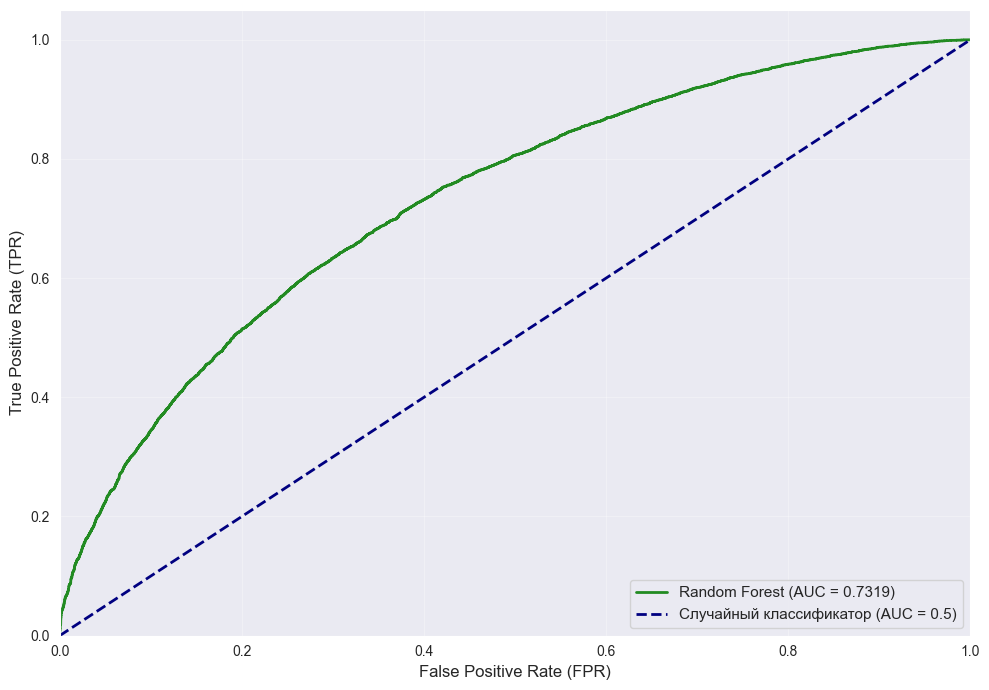

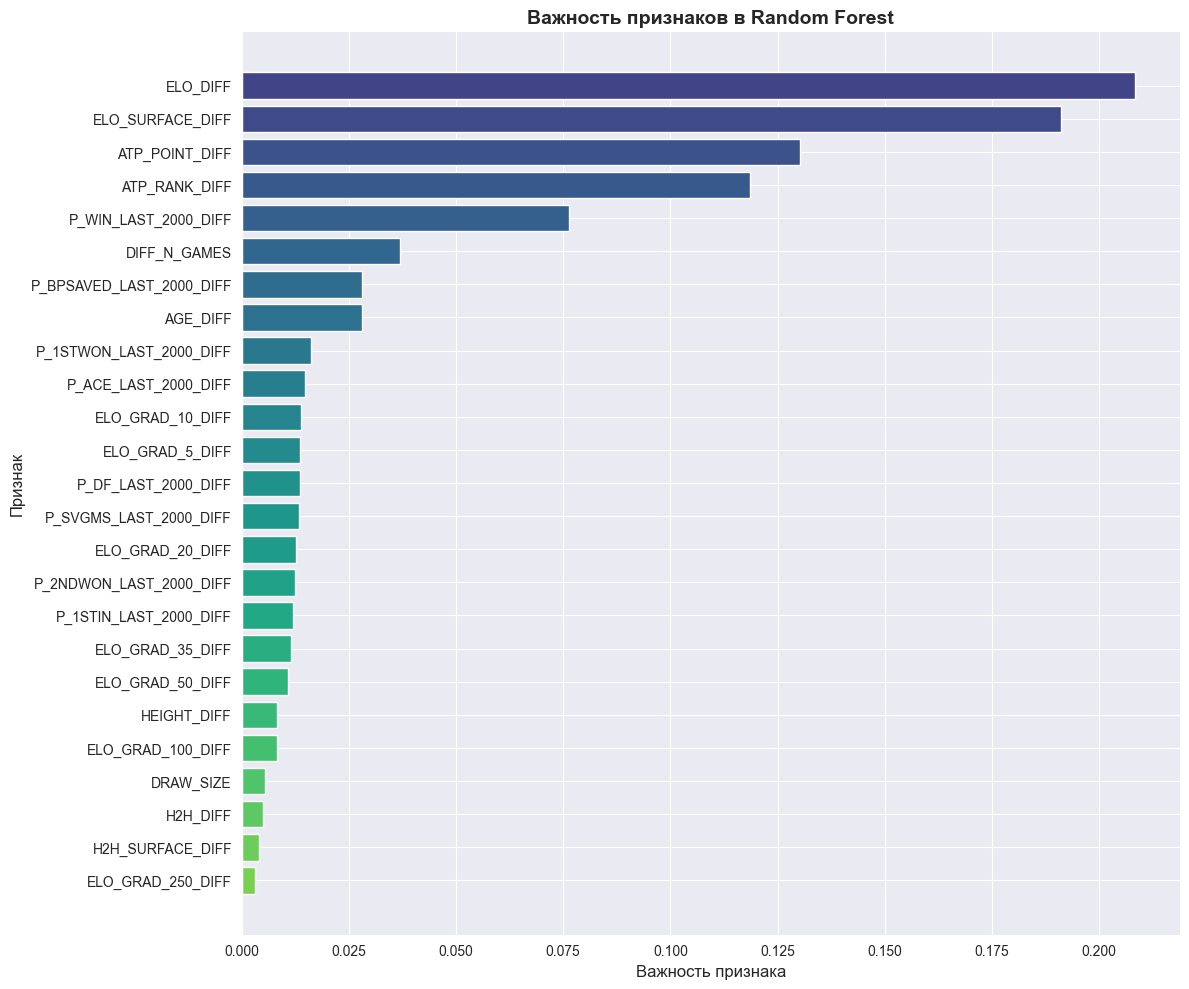

In [10]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np



print("ПОСТРОЕНИЕ СЛУЧАЙНОГО ЛЕСА (400 ДЕРЕВЬЕВ)")



df = pd.read_csv("norm_dataframe.csv", index_col=0)

target = "RESULT"
print(f"\nЦелевая переменная: {target}\n")

drop_cols = ["match_idx", "tourney_date", "PLAYER_1", "PLAYER_2"]
drop_cols = [col for col in drop_cols if col in df.columns]


df_clean = df.drop(columns=drop_cols)

X = df_clean.drop(columns=[target])
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]


train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

print(f"РЕЗУЛЬТАТЫ RANDOM FOREST (400 деревьев):")
print(f"Train Accuracy: {train_accuracy_rf:.4f} ({train_accuracy_rf * 100:.2f}%)")
print(f"Test Accuracy:  {test_accuracy_rf:.4f} ({test_accuracy_rf * 100:.2f}%)")
print(f"ROC-AUC Score:  {roc_auc_rf:.4f}")


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='forestgreen', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Случайный классификатор (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)



plt.figure(figsize=(12, 10))
top_features = feature_importance.head(25)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))
plt.barh(top_features['feature'], top_features['importance'], color=colors)
plt.xlabel('Важность признака', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

